In [1]:
#  Global Pollution Analysis & Energy Recovery — Jupyter Notebook Structure

In [2]:
# Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, r2_score,
    accuracy_score, classification_report, confusion_matrix
)
import warnings
warnings.filterwarnings("ignore")


In [5]:
# Manually create the dataset from your provided sample
df = pd.read_csv('Global_Pollution_Analysis.csv')
df.head()

,Country,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD)
0,Hungary,2005,272.70,124.27,51.95,94802.83,158.14,5.30,41.11,37078.88,12.56,42.22,20972.96
1,Singapore,2001,86.72,60.34,117.22,56283.92,498.04,6.34,36.44,33128.20,5.23,137.25,34850.41
2,Romania,2016,91.59,83.36,121.72,56256.02,489.51,49.69,9.38,18803.46,13.15,124.47,57773.15
3,Cook Islands,2018,280.61,67.16,93.58,74864.73,145.18,8.91,18.97,9182.27,0.78,67.80,21837.51
4,Djibouti,2008,179.16,127.53,121.55,76862.06,40.38,14.93,34.00,39235.12,12.84,186.52,41379.37


In [6]:
# Exploratory Data Analysis (EDA)
def eda(df):
    print("Dataset Shape:", df.shape)
    print("Columns:", df.columns)
    print("Data Types:\n", df.dtypes)
    print("Missing Values:\n", df.isnull().sum())
    print("Descriptive Statistics:\n", df.describe())
eda(df)


Dataset Shape: (200, 13)
Columns: Index(['Country', 'Year', 'Air_Pollution_Index', 'Water_Pollution_Index',
       'Soil_Pollution_Index', 'Industrial_Waste (in tons)',
       'Energy_Recovered (in GWh)', 'CO2_Emissions (in MT)',
       'Renewable_Energy (%)', 'Plastic_Waste_Produced (in tons)',
       'Energy_Consumption_Per_Capita (in MWh)', 'Population (in millions)',
       'GDP_Per_Capita (in USD)'],
      dtype='object')
Data Types:
 Country                                    object
Year                                        int64
Air_Pollution_Index                       float64
Water_Pollution_Index                     float64
Soil_Pollution_Index                      float64
Industrial_Waste (in tons)                float64
Energy_Recovered (in GWh)                 float64
CO2_Emissions (in MT)                     float64
Renewable_Energy (%)                      float64
Plastic_Waste_Produced (in tons)          float64
Energy_Consumption_Per_Capita (in MWh)    float64
Popula

In [ ]:
# handling missing values
def handle_missing_values(df):
    # Fill missing values with mean for numerical columns
    for col in df.select_dtypes(include=[np.number]).columns:
        df[col].fillna(df[col].mean(), inplace=True)
    
    # Fill missing values with mode for categorical columns
    for col in df.select_dtypes(include=[object]).columns:
        df[col].fillna(df[col].mode()[0], inplace=True)
    
    return df
df = handle_missing_values(df)

In [8]:
# step 2: Clean and Transform the Data
# handle missing values
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
Country                                   0
Year                                      0
Air_Pollution_Index                       0
Water_Pollution_Index                     0
Soil_Pollution_Index                      0
Industrial_Waste (in tons)                0
Energy_Recovered (in GWh)                 0
CO2_Emissions (in MT)                     0
Renewable_Energy (%)                      0
Plastic_Waste_Produced (in tons)          0
Energy_Consumption_Per_Capita (in MWh)    0
Population (in millions)                  0
GDP_Per_Capita (in USD)                   0
dtype: int64


In [10]:
'''data Transformation


Normalize or scale pollution indices (air, water, and soil).
Encode categorical features such as Country and Year using label encoding or one-hot encoding.'''

def transform_data(df):
    # Normalize pollution indices
    scaler = StandardScaler()
    df[['Air_Pollution_Index', 'Water_Pollution_Index', 'Soil_Pollution_Index']] = scaler.fit_transform(
        df[['Air_Pollution_Index', 'Water_Pollution_Index', 'Soil_Pollution_Index']]
    )
    
    # Encode categorical features
    label_encoder = LabelEncoder()
    df['Country'] = label_encoder.fit_transform(df['Country'])
    df['Year'] = label_encoder.fit_transform(df['Year'])
    
    return df
df = transform_data(df)

In [15]:
# Label encode 'Country' (or use pd.get_dummies for more countries)
le = LabelEncoder()
df['Country_encoded'] = le.fit_transform(df['Country'])

# Year is numeric; we can keep it as-is or normalize later


In [16]:
scaler = StandardScaler()
cols_to_scale = ['Air_Pollution_Index', 'Water_Pollution_Index', 'Soil_Pollution_Index']
df_scaled = df.copy()
df_scaled[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])


In [17]:
df.describe()


,Country,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste_in_tons,Energy_Recovered_in_GWh,CO2_Emissions_in_MT,Renewable_Energy_%,Plastic_Waste_Produced_in_tons,Energy_Consumption_Per_Capita_in_MWh,Population_in_millions,GDP_Per_Capita_in_USD,Country_encoded
count,200.000000,200.000000,2.000000e+02,2.000000e+02,2.000000e+02,200.00000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000
mean,88.575000,9.335000,7.549517e-17,-3.552714e-16,2.486900e-16,52891.68150,260.448700,24.878100,27.799700,24492.893550,9.43575,104.271300,35307.602400,88.575000
std,49.924107,5.765325,1.002509e+00,1.002509e+00,1.002509e+00,27224.49169,147.141923,14.470892,12.361879,14421.356002,5.57567,56.906574,19481.714455,49.924107
min,0.000000,0.000000,-1.947928e+00,-1.768540e+00,-1.650240e+00,1019.37000,11.730000,1.920000,5.040000,542.950000,0.53000,2.320000,1298.700000,0.000000
25%,45.750000,4.000000,-6.823730e-01,-8.536990e-01,-8.989775e-01,31201.97250,118.355000,11.220000,17.700000,12843.882500,4.58250,60.960000,19525.020000,45.750000
50%,90.500000,10.000000,4.122312e-02,-5.821733e-02,5.332837e-02,55299.15000,273.140000,25.355000,29.170000,24121.540000,9.22500,104.965000,35043.325000,90.500000
75%,131.000000,14.000000,8.489305e-01,8.935479e-01,8.265007e-01,74805.82500,384.957500,38.550000,37.072500,36516.232500,13.99750,150.930000,51629.547500,131.000000
max,174.000000,19.000000,1.753566e+00,1.775151e+00,1.837213e+00,99739.36000,499.980000,49.690000,49.560000,49852.280000,19.98000,198.820000,69143.140000,174.000000


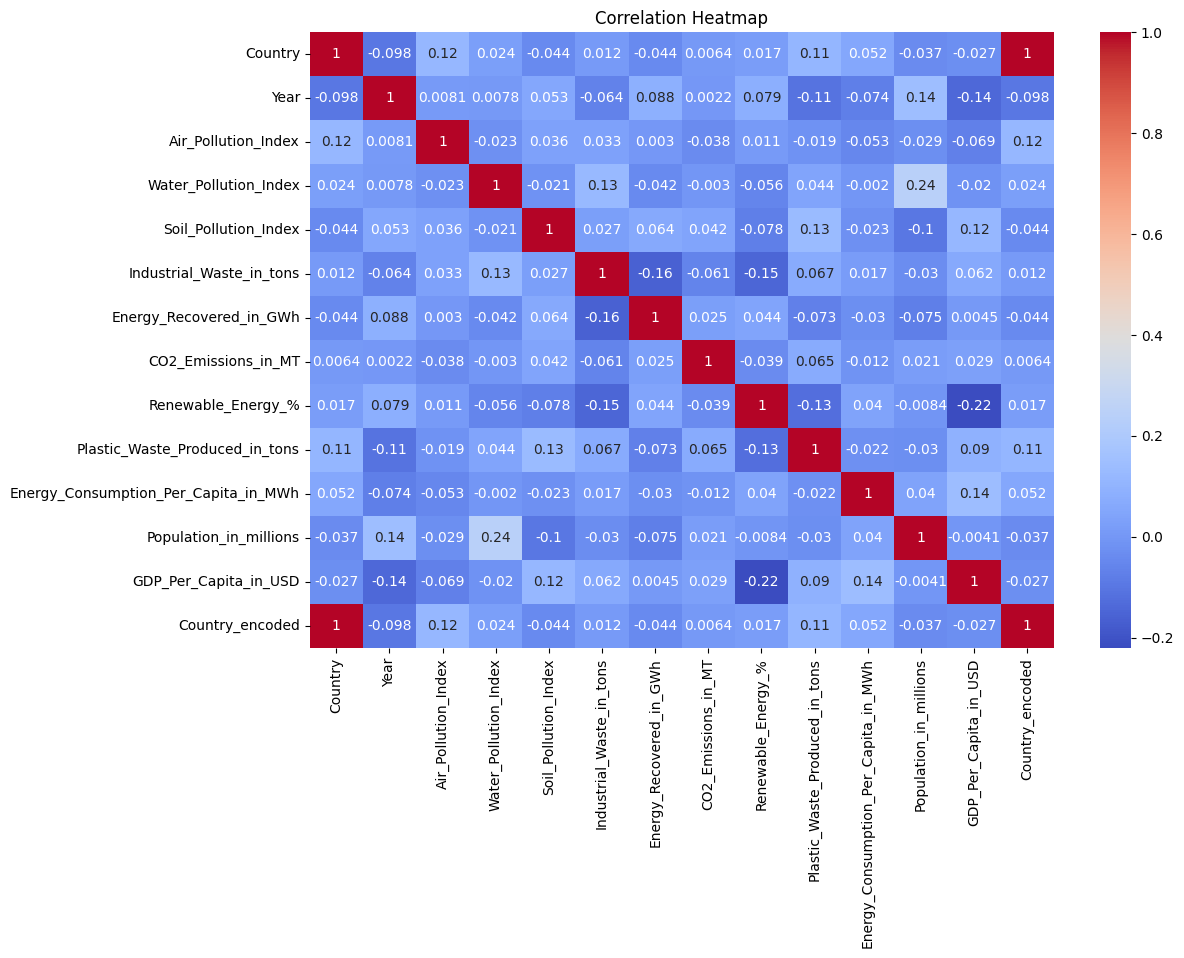

In [18]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


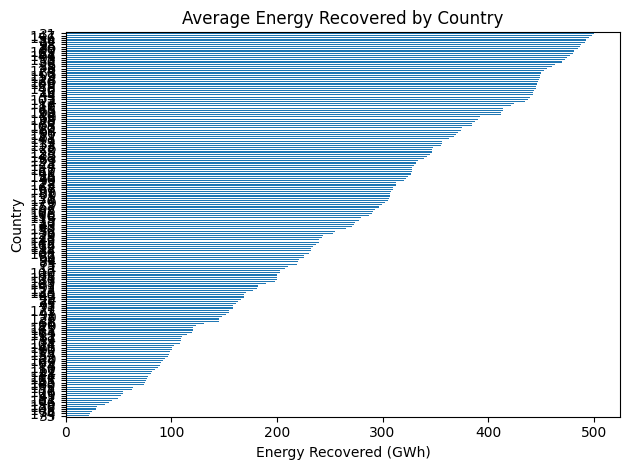

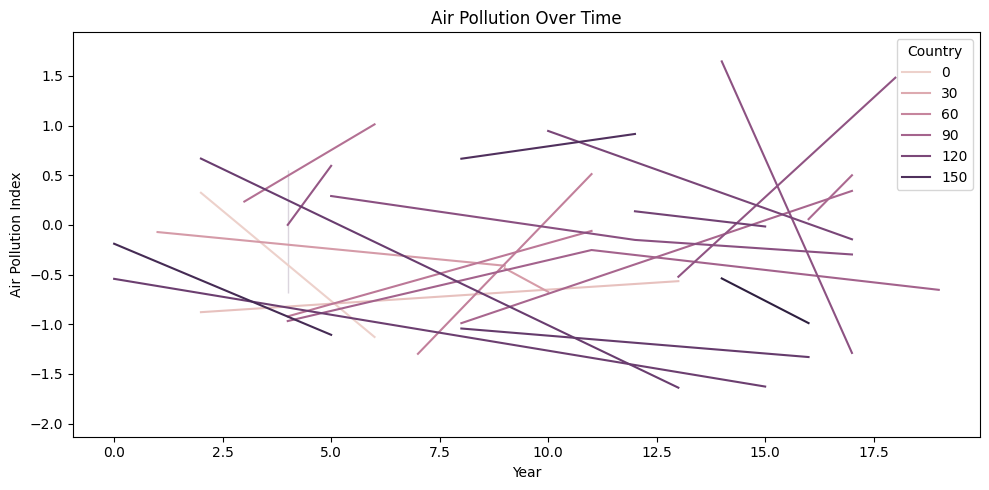

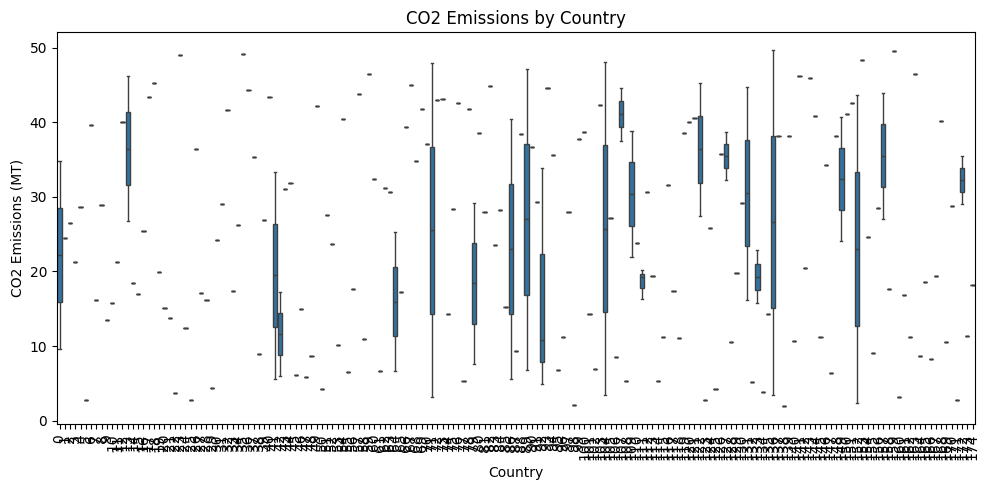

In [30]:

# Use the correct column name directly
df.groupby('Country')['Energy_Recovered_in_GWh'].mean().sort_values().plot(kind='barh')
plt.title("Average Energy Recovered by Country")
plt.xlabel("Energy Recovered (GWh)")
plt.tight_layout()
plt.show()

# Line plot - Air Pollution over years by country
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='Year', y='Air_Pollution_Index', hue='Country')
plt.title("Air Pollution Over Time")
plt.xlabel("Year")
plt.ylabel("Air Pollution Index")
plt.tight_layout()
plt.show()

# Box plot - CO2 emissions by country
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Country', y='CO2_Emissions_in_MT')
plt.xticks(rotation=90)
plt.title("CO2 Emissions by Country")
plt.xlabel("Country")
plt.ylabel("CO2 Emissions (MT)")
plt.tight_layout()
plt.show()


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Features and target
X = df[['Air_Pollution_Index', 'Water_Pollution_Index', 'Soil_Pollution_Index', 'CO2_Emissions_in_MT', 'Country_encoded']]
y = df['Energy_Recovered_in_GWh']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

# Evaluation
print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))


R² Score: -0.07806440299818518
MSE: 26070.008433625713
MAE: 144.81861671533088


In [34]:
# Logistic Regression for classification task
# Categorize pollution levels
df['Pollution_Level'] = pd.cut(df['Air_Pollution_Index'], bins=[-float("inf"), -0.5, 0.5, float("inf")], labels=['Low', 'Medium', 'High'])


              precision    recall  f1-score   support

           0       0.87      0.87      0.87        15
           1       0.86      0.75      0.80        16
           2       0.82      1.00      0.90         9

    accuracy                           0.85        40
   macro avg       0.85      0.87      0.86        40
weighted avg       0.85      0.85      0.85        40



<Axes: >

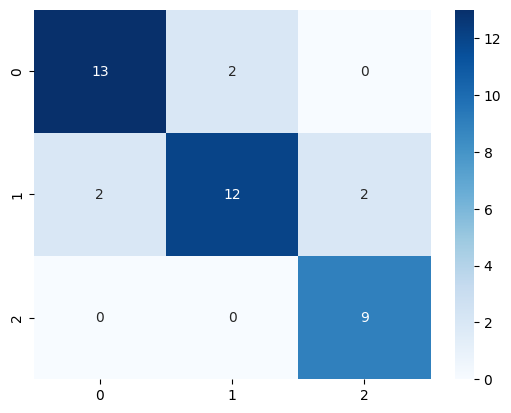

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Features and labels
X_class = df[['Air_Pollution_Index', 'Water_Pollution_Index', 'Soil_Pollution_Index', 'CO2_Emissions_in_MT', 'Country_encoded']]
y_class = df['Pollution_Level']
# Encode labels
y_class_encoded = y_class.astype('category').cat.codes

# Train-test split
Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_class, y_class_encoded, test_size=0.2, random_state=42)

# Model
clf = LogisticRegression(multi_class='ovr', max_iter=200)
clf.fit(Xc_train, yc_train)
yc_pred = clf.predict(Xc_test)

# Evaluation
print(classification_report(yc_test, yc_pred))
sns.heatmap(confusion_matrix(yc_test, yc_pred), annot=True, fmt='d', cmap='Blues')
